In [ ]:
# Logistic Regression
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
# load the iris datasets
# datasets this is a sklearn utility which loads a dataset for you
# existing datasets include load_boston (boston house prices)
# or load_diabetes (diabetes data set)
# Here, we load the iris dataset
# To access the feature vector, call datasets.data => returns X, a 150x4 array
# To acess the target , call datasets.target => returns Y, an array with 150 entries
# Basically, we have 150 samples, each sample being describes by 5 variables (= features)
dataset = datasets.load_iris()

In [ ]:
#Let us now build a pandas dataframe hosting the data at hand

# We first need the list of feature names for our columns
# It is already stored in the dataset. Let's use it
lfeat = dataset.feature_names 

In [ ]:
# We now build the Dataframe, with the data as argument
# and the list of column names as keyword argument
df_iris = pd.DataFrame(dataset.data, columns = lfeat)

In [ ]:
# Let's have a look at the first few entries
print "Printing data up to the 5th sample"
df_iris.iloc[:5,:] # Look at the first 5 samples for all features.

In [ ]:
# We also want to add the regression target
# Let's create a new column :
df_iris["Species"] = dataset.target # Must have the correct size of course

In [ ]:
#Let's review our complete dataframe:
print
print "Printing data up to the 5th sample"
print "Also print the target"
df_iris.iloc[:5,:] # Look at the first 5 samples for all features incuding target

In [ ]:
# We will fit a logistic regression model to the data
# This model is used for classification problems :
# Given some data X, we want to assign a class to each sample
# In the iris dataset, there are three classes, corresponding to three species of iris
# We want to be able to estimate the class given some features.

# Let's start with a 2-class classification problem.
# The goal is to find a linear boundary between these 2 classes (1)
# This boundary has an equation of the form {b0+b.T * X = 0}
# How do we determine the coefficients of this boundary ?

#Let's reformulate the problem :
# We want to find P(y|x) that is the probability, given observation x of
# the sample belonging to class y

# For a 2-class problem, we need the probabilities to sum to 1 :
# P(y=1|x) + P(y=0|x) = 1 (2)

#We decide on the class of x based on the ratio 
# P(y=1|x)/P(y=0|x) (if its >1 then x is classified as class 1)

#This equation gives us our decision boundary, which we want to be linear in x as per (1)
# Actually, it is sufficient that a monotone transformation of the decision boundary should be linear in x
# With this requirement, we introduce the logistic model for P(y|x):
# P(y=1|x) = exp(b0 +b.T*x)/(1+exp(b0+b.T*x))
#P(y=0|x) = 1/(1+exp(b0+b.T*x))

# with this choice, clearly (2) is verified

# Taking the log of P(y=1|x)/P(y=0|x), we get :
# log(P(y=1|x)/P(y=0|x)) = b0 +b.T*x, our linear decision boundary in x

# We have now motivated the logistic regression model.
# How do we train it ? (i.e. how do we find b and b0)

# We can see it as a likelihood problem, where the loglikelihood is :
# log(P(y1|x1)) + log(P(y2|x2)) + ... (the sum is on the training samples)
# Maximising the log likelihood, we get our estimate for b0 and b. 

# fit a logistic regression model to the data
# This creates an instance of the logistic Regression class of model
model = LogisticRegression()

In [ ]:
#the model.fit command will automatically find the coefficient b we talked about earlier
# we only have to specify X = dataset.data and Y = dataset.target
# with pandas we have to split the df in two :
# the feature part (X) and the target part (Y)
# This is done below :

data = df_iris[lfeat].values
target = df_iris["Species"].values
model.fit(data, target)
print(model)

In [ ]:
# Once the model has been fitted, it can be used to make new predictions
# to this end, we simply call model.predict(x)
expected = target
predicted = model.predict(data)

In [ ]:
# summarize the fit of the model
# we can estimate the performance of the fit using standard metrics
# which are summarised in classification_report (precision, recall, f1, support) 
print(metrics.classification_report(expected, predicted))
# and the confusion matrix
print(metrics.confusion_matrix(expected, predicted))

# Business formulation

In real life, classification problems are everywhere
Assume you are part of the university board overseeing admissions
You receive a lot of applications that you want to sort
You are looking to create 2 groups of students
1) Probably bad 2) Probably good candidates
You can check the applications one by one (browsing academic record, cover letter etc)
But you would like to come up with an automatic way to do it, as a cross check.

How do we do that ?

Assume we are given students and some data for each student (his, age, his gpa, his gpa last year, his extra scholar activities...)
We will see how we can use this data to come up with an efficient classification

What is the simplest thing we can do ?

We could think of first making a simple decision :
Students with GPA > 3  are probably good candidates and students with GPA <3 are probably bad candidates

Mathematically, what we have done here is a linear separation of the students
Think of it as drawing straight horizontal lines to separate the distribution of student's GPA
into two groups.

Do we have a way to find the optimal boundaries ? i.e. choosing the boundaries such that
the students' capabilities are assessed correctly ?

This is what logistic regression is about !

Logistic regression does two things:

1. It gives a linear separation of your data
2. It gives you a probabilitiy interpretation

Let us explain that through an example

Imagine you have a situation like the one on log_reg_student1.png
Logistic regression will find a way to draw a line to separate the two classes
In a way that makes the misclassification error small
And it will give you a function of the data
in this P(GPA, GPA last year)
which can be interpreted as the probability that a sample belongs to a particular class
As an example, if both GPA and GPA last year are high,
we expect P(student = good student) is close to 1 


We can extend this with more variables (not just two)
But it is more difficult to visualise a straight line in a high dimensional space

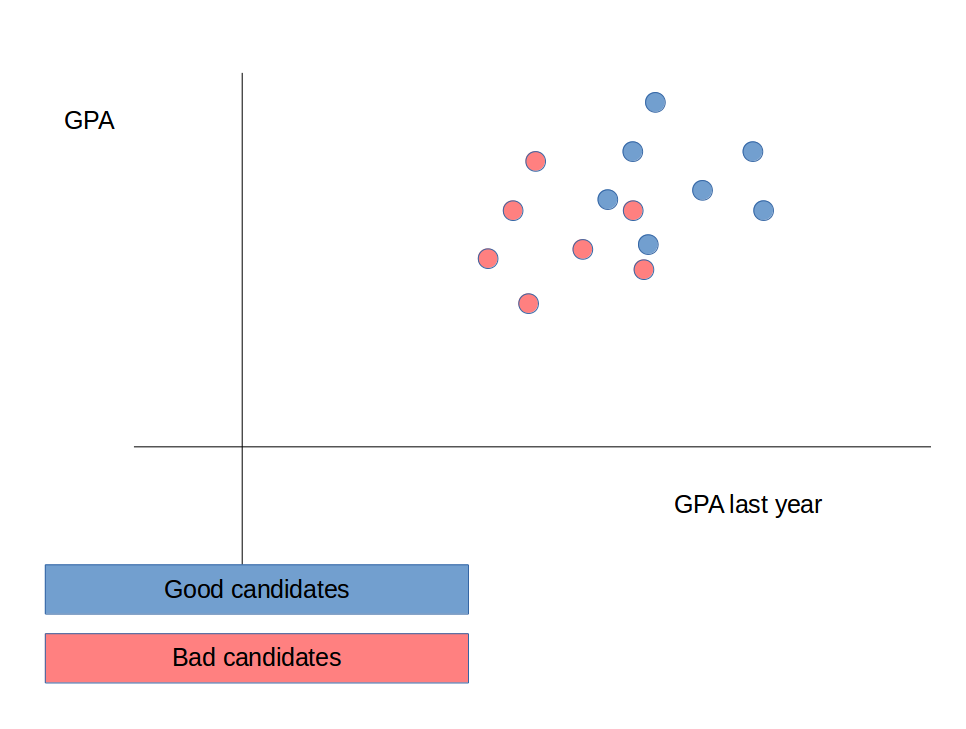

In [8]:
from IPython.display import Image
Image('figures/log_reg_student1.png')

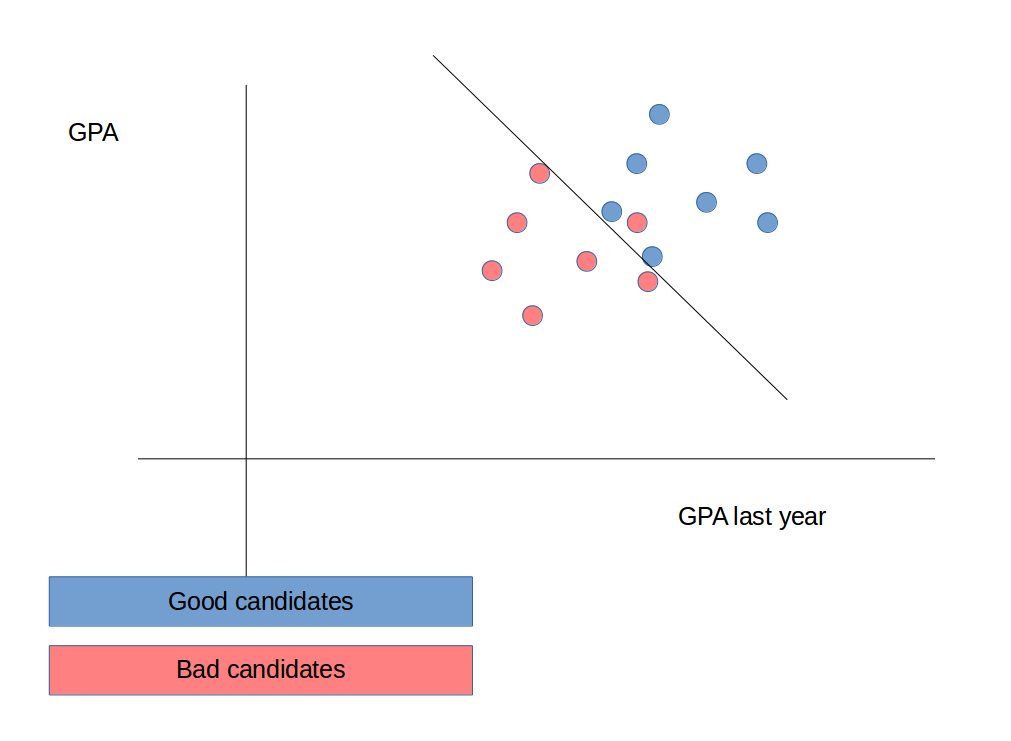

In [9]:
Image('figures/log_reg_student2.png')